In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb

In [30]:
df = pd.read_csv('clean_data.csv')
df.head(20)

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
5,25.29,4.71,Male,No,Sun,Dinner,4,18.623962
6,8.77,2.00,Male,No,Sun,Dinner,2,22.805017
7,26.88,3.12,Male,No,Sun,Dinner,4,11.607143
8,15.04,1.96,Male,No,Sun,Dinner,2,13.031915
9,14.78,3.23,Male,No,Sun,Dinner,2,21.853857


In [4]:
x= df.drop('tip', axis=1)
y = df['tip']

In [5]:
from sklearn.preprocessing import LabelEncoder  # Difference b/w OneHotEncoder and LabelEncoder ?

le = LabelEncoder() 
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['time'] = le.fit_transform(df['time'])
df['day'] = le.fit_transform(df['day'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,0,0,2,0,2,5.944673
1,10.34,1.66,1,0,2,0,3,16.054159
2,21.01,3.50,1,0,2,0,3,16.658734
3,23.68,3.31,1,0,2,0,2,13.978041
4,24.59,3.61,0,0,2,0,4,14.680765


In [6]:
df.shape

(244, 8)

In [7]:
df.dropna(inplace=True)

C:\Users\Shishupal Kumar\AppData\Local\Temp\ipykernel_20640\2877701566.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'] , color='blue')


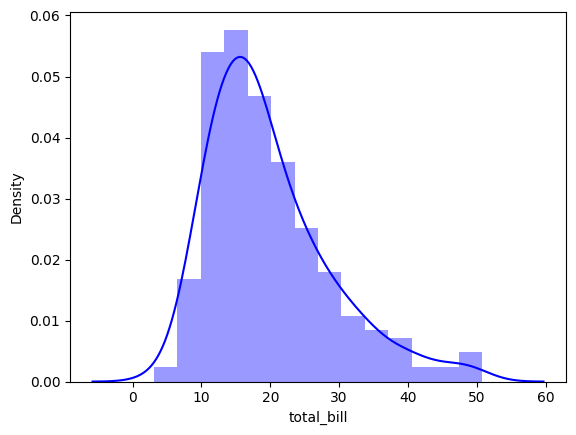

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['total_bill'] , color='blue')


plt.show()



C:\Users\Shishupal Kumar\AppData\Local\Temp\ipykernel_20640\2731473159.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tip'], color='green')


<Axes: xlabel='tip', ylabel='Density'>

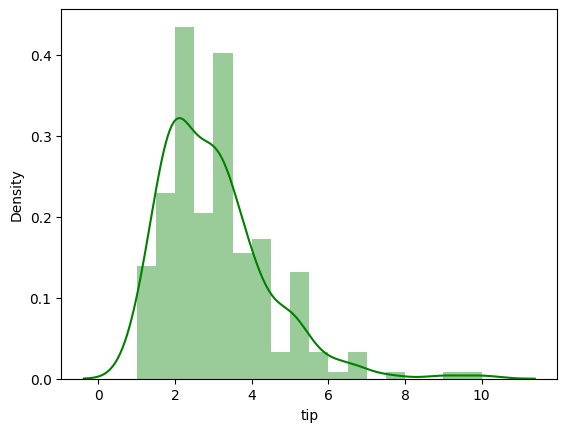

In [9]:
sns.distplot(df['tip'], color='green')


C:\Users\Shishupal Kumar\AppData\Local\Temp\ipykernel_20640\393166219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['size'], color='red')


<Axes: xlabel='size', ylabel='Density'>

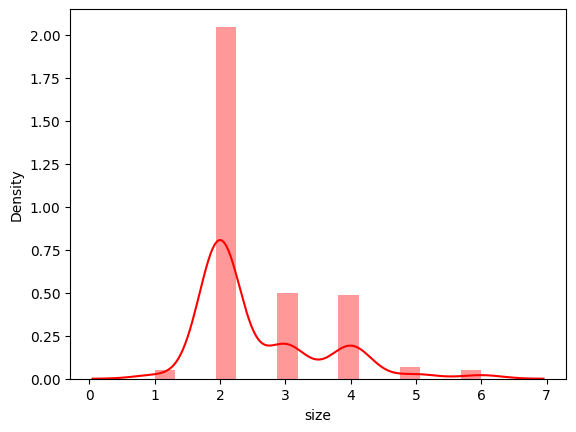

In [10]:
sns.distplot(df['size'], color='red')


C:\Users\Shishupal Kumar\AppData\Local\Temp\ipykernel_20640\3152736585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['day'] , color='purple')


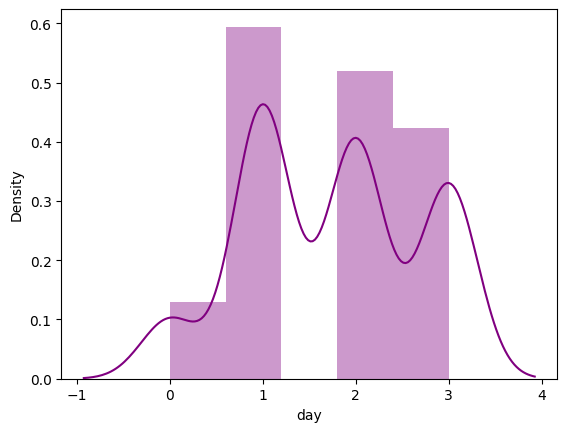

In [11]:
sns.distplot(df['day'] , color='purple')
plt.show()

In [12]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'tip_percentage'],
      dtype='object')

In [13]:
df.head(20)

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,0,0,2,0,2,5.944673
1,10.34,1.66,1,0,2,0,3,16.054159
2,21.01,3.50,1,0,2,0,3,16.658734
3,23.68,3.31,1,0,2,0,2,13.978041
4,24.59,3.61,0,0,2,0,4,14.680765
5,25.29,4.71,1,0,2,0,4,18.623962
6,8.77,2.00,1,0,2,0,2,22.805017
7,26.88,3.12,1,0,2,0,4,11.607143
8,15.04,1.96,1,0,2,0,2,13.031915
9,14.78,3.23,1,0,2,0,2,21.853857


In [14]:
# Remove Outliers for total_bill column
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

outliers = df[(df['total_bill'] < lower_bound) | (df['total_bill']>upper_bound)]
outliers

#Capping
new_df_cap_totalBill = df.copy()
new_df_cap_totalBill['total_bill'] = np.where(new_df_cap_totalBill['total_bill']<lower_bound,
                                              lower_bound,
                                              np.where(new_df_cap_totalBill['total_bill']>upper_bound,
                                                       upper_bound,
                                                       new_df_cap_totalBill['total_bill']))



In [15]:
# Outlier of tip
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound  = Q3+1.5*IQR

outliers = df[(df['tip'] < lower_bound) | (df['tip']>upper_bound)]
outliers

# Capping 
new_df_cap_tip = df.copy()
new_df_cap_tip['tip']= np.where(new_df_cap_tip['tip']<lower_bound,
                                lower_bound,
                                np.where(new_df_cap_tip['tip']> upper_bound,
                                         upper_bound,
                                         new_df_cap_tip['tip']))
new_df_cap_tip.shape

(244, 8)

In [16]:
# Outliers of tip_percentage columns
Q1 = df['tip_percentage'].quantile(0.25)
Q3 = df['tip_percentage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

outliers = df[(df['tip_percentage']<lower_bound) | (df['tip']>upper_bound)]
outliers

,total_bill,tip,sex,smoker,day,time,size,tip_percentage


In [17]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size = 0.2, random_state=42)

In [18]:
# linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)
y_pred


array([16.18750656, 19.34741696,  7.2180883 , 22.59838597, 17.43943432,
       14.40865821,  8.40082854, 18.41361423, 20.68909001, 20.18966268,
       16.9724782 , 14.8417849 , 14.94213899, 16.95906714, 17.10544169,
        8.13834558, 22.3477044 , 18.87746305, 15.48692215,  8.07029652,
       11.89369085, 16.20985598, 26.23000296, 15.65934263, 19.25980392,
       17.85990464, 16.8494095 , 22.77057947, 13.24632759,  3.46085628,
        6.76030351, 18.84790239, 13.37766157, 17.86061814, 20.31685523,
       11.30869908, 15.42923842,  8.82819821, 18.99643911, 10.33879732,
       13.99228605, 14.42031887, 10.60387911, 16.59921341, 19.28084162,
       20.56440757, 17.67108516, 12.74070512, 16.82043624])

In [19]:
# Model Evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,accuracy_score
r2_score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print("R2 score:", r2_score)
print("MAE: ", mae)
print("MSE:", mse)
print("RMSE:",rmse)

R2 score: 0.7092669728444396
MAE:  1.7433150490541864
MSE: 7.051104314746556
RMSE: 2.6553915558249703


In [20]:
# # ROC-AUC Curve
# from sklearn.metrics import roc_curve , roc_auc_score
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# #compute AUC Score
# auc_score  = roc_auc_score(y_test, y_pred)
# print("AUC Score:", auc_score)

# # Plot ROC curve
# plt.plot(fpr,tpr,label='ROC Curve (AUC= {:.3f})'.format(auc_score))
# plt.plot([0,1],[0,1] , 'k--', label='Random Guess Line')  # Diagonal line
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC - AUC Curve")
# plt.legend()
# plt.show()

In [21]:
# Random Forests
rf = RandomForestRegressor(n_estimators=200 , max_depth=None , random_state=42)

# rf = RandomForestRegressor(
#     n_estimators=200,
#     max_depth=10,
#     min_samples_split=5,
#     min_samples_leaf=4,
#     max_features='sqrt'
# )

rf.fit(x_train , y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [22]:
y_pred = rf.predict(x_test)


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 1.0855836341326153
MSE: 4.907048677210896
RMSE: 4.907048677210896
R2 Score: 0.79767125082215


In [24]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

train_score = r2_score(y_train , y_train_pred)
test_score = r2_score(y_test, y_test_pred)

print("Train R2: ", train_score)
print("Test R2: ", test_score)

Train R2:  0.96372490549485
Test R2:  0.79767125082215


In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,0,0,2,0,2,5.944673
1,10.34,1.66,1,0,2,0,3,16.054159
2,21.01,3.50,1,0,2,0,3,16.658734
3,23.68,3.31,1,0,2,0,2,13.978041
4,24.59,3.61,0,0,2,0,4,14.680765


In [28]:
import pickle as pkl
pkl.dump(rf, open('model.pkl', 'wb'))

In [29]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt
# import numpy as np

# train_sizes, train_score, test_score = learning_curve(
#     rf, x, y, cv=5, scoring='r2'
# )

# train_mean = np.mean(train_score, axis=1)
# test_mean  = np.mean(test_score, axis=1)

# plt.plot(train_sizes, train_mean, label="Train Score")
# plt.plot(train_sizes, test_mean, label="Test Score")
# plt.xlabel("Training Data Size")
# plt.ylabel("R2 Score")
# plt.legend()
# plt.show()




# XG Boost

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100,
                         learning_rate=0.1,
                         max_depth=5,
                         subsample=0.8,
                         random_state=42,
                         colsample_bytree=0.8,
                         objective='reg:squarederror'
                         )

xgb_model.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model.predict(x_test)


In [ ]:
# Evaluation the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:",rmse)
print("R2 Score:",r2)


MAE: 1.6971214816382505
MSE: 10.31438326076082
RMSE: 3.211601354583227
R2 Score: 0.5747145787685857
